In [1]:
import pickle
best_params = pickle.load(open("best_params.pickle", "rb"))
best_params

FileNotFoundError: [Errno 2] No such file or directory: 'best_params.pickle'

In [1]:
import pandas as pd
import sklearn
import numpy as np
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import nltk

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from nlp_ai_utils import *

In [3]:
df = pd.read_csv("../smaller_dataset/yelp coffee/raw_yelp_review_data_processed.csv")
df_unprocessed = pd.read_csv("../smaller_dataset/yelp coffee/raw_yelp_review_data.csv")

In [19]:
y = df['star_rating']
classes_range = range(1,6)

In [20]:
list(classes_range)

[1, 2, 3, 4, 5]

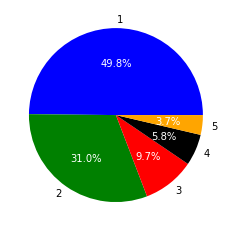

In [21]:
visualize_ratings_pie(y,1,5)

In [16]:
test1 = list(range(1,6))
test2 = [1,2,3,4,5]

test1

[1, 2, 3, 4, 5]

In [24]:
def tokenize_review(text):
    return nltk.word_tokenize(text)

In [25]:
reviews_tokens = [tokenize_review(review) for review in X]

In [1]:
model = Word2Vec(sentences=reviews_tokens, vector_size=100, window=5, min_count=1, workers=4)
# model.save("test_w2v.model")

NameError: name 'Word2Vec' is not defined

In [35]:
X = np.zeros((len(reviews_tokens), model.vector_size))
labels = y
for i, review in enumerate(reviews_tokens):
    for word in review:
        if word in model.wv:
            X[i] += model.wv[word]
    X[i] /= len(reviews_tokens)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,labels,stratify=labels,test_size=0.2,random_state=42)

In [50]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)

In [51]:
accuracy

0.5516992046276211

In [60]:
test_review = "This coffee is a vibe. I cannot imagine living in a world where you do not exist, Starbucks."
test_token = nltk.word_tokenize(test_review)
test_vector = np.zeros(model.vector_size)
for word in test_token:
    if word in model.wv:
        test_vector += model.wv[word]
test_vector /= len(test_token)
predicted_label = clf.predict([test_vector])[0]

In [61]:
predicted_label

4